In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
"Variable Costs"
data = {'YEAR':[2015, 2020, 2025, 2030, 2040, 2050],
        'LFO':[15.89 , 14.75, 15.43, 17.25 ,20.43, 23.61],
        'HFO':[9.56, 8.87, 9.28, 10.38, 12.29, 14.2],
        'NG' :[3.76, 4.65, 5.54, 6.43, 8.22, 10.01]
       
       }
data = pd.DataFrame(data)
data.set_index('YEAR').T

YEAR,2015,2020,2025,2030,2040,2050
LFO,15.89,14.75,15.43,17.25,20.43,23.61
HFO,9.56,8.87,9.28,10.38,12.29,14.20
NG,3.76,4.65,5.54,6.43,8.22,10.01


In [88]:
xf = data.index.values
xf.reshape(-1,1) # (6,1) 

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

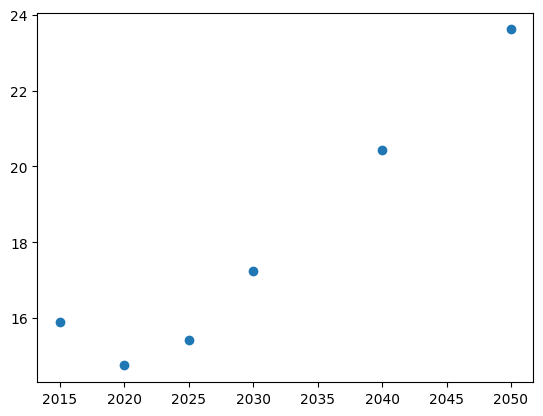

In [89]:
x = data[['YEAR']].values
# x = xf.reshape(-1,1)
LFO = data['LFO'].values
HFO = data['HFO'].values
plt.scatter(x,LFO)
plt.show()

In [90]:
x

array([[2015],
       [2020],
       [2025],
       [2030],
       [2040],
       [2050]], dtype=int64)

In [91]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,LFO)
y_pred = model.predict(x)

plt.scatter(x,LFO,color = 'blue')
plt.plot(x,y_pred, color= 'r')

NameError: name 'y' is not defined

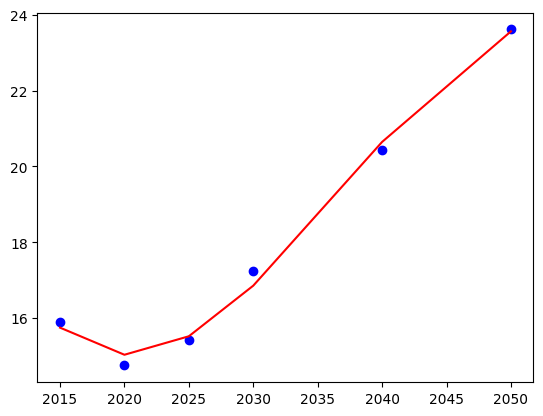

In [92]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x)
model1 = LinearRegression()
model1.fit(x_poly, LFO)
y_pred1 = model1.predict(x_poly)

plt.scatter(x,LFO, color = 'blue')
plt.plot(x, y_pred1, color = 'red')
plt.show()

In [93]:
model1.coef_[2]

2.8947578764067825

In [94]:
coefficients = model1.coef_
intercept = model1.intercept_
# Use the coefficients to form the equation of the fitted polynomial
equation = "y = "
for i in range(len(coefficients)):
    if i == 0:
        equation += f"{coefficients[i]:.2f}"
    else:
        equation += f" + {coefficients[i]:.6f}x^{i}"

equation += f" + {intercept:.2f}"
print("Equation of the Fitted Polynomial:", equation)

Equation of the Fitted Polynomial: y = 0.00 + -5896.002955x^1 + 2.894758x^2 + -0.000474x^3 + 4002716.35


In [95]:
values = []
for i in list(range(2019,2051)):
   values.append(i**3*model1.coef_[3] + i**2*model1.coef_[2]+i*model1.coef_[1]+ model1.intercept_) 

In [96]:
def fuelprices(year, fuel_data):
    x = data[['YEAR']].values
    fuel = fuel_data
    poly = PolynomialFeatures(degree = 3)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, fuel)
    y_pred = model1.predict(x_poly)
    values = []
    for i in list(range(2019,2051)):
        values.append(i**3*model.coef_[3] + i**2*model.coef_[2]+i*model.coef_[1]+ model.intercept_) 
    return  values
    


In [97]:
excel = []
for fuel in data.columns[1:]:
#     pd.DataFrame(fuelprices(data[['YEAR']].values,data[fuel] )).to_excel(fuel+'.xlsx')
    pd.DataFrame(fuelprices(data[['YEAR']].values,data[fuel] ))

In [98]:
consolidated_dfs = []  # Initialize an empty list to store the DataFrames

# Iterating through the columns and creating DataFrames
for fuel in data.columns[1:]:  # Assuming the columns contain fuel data
    # Assuming 'fuelprices' is a function that returns a DataFrame
    fuel_df = pd.DataFrame(fuelprices(data[['YEAR']].values, data[fuel]))
    consolidated_dfs.append(fuel_df)  # Append the DataFrame to the list

# Consolidate the DataFrames into a single DataFrame
final_df = pd.concat(consolidated_dfs, axis = 1)
final_df.columns= (data.columns[1:])

In [99]:
final_df

,LFO,HFO,NG
0,15.068146,9.063264,4.471216
1,15.032704,9.041803,4.649090
2,15.045362,9.049348,4.827038
3,15.103278,9.084181,5.005057
4,15.203609,9.144587,5.183144
5,15.343514,9.228848,5.361298
6,15.520149,9.335248,5.539517
7,15.730674,9.462071,5.717799
8,15.972244,9.607599,5.896141
9,16.242019,9.770117,6.074543


In [100]:
final_df = pd.DataFrame()
for fuel in data.columns[1:]:  # Assuming the columns contain fuel data
    fuel_df = pd.DataFrame(fuelprices(data[['YEAR']].values, data[fuel]))
    final_df = pd.concat([final_df, fuel_df], axis=1)
    final_df.rename(columns={0: fuel}, inplace=True)

In [101]:
final_df.index = list(range(2019,2051))

In [102]:
final_df.T.to_excel('FuelPrices.xlsx')

In [103]:
#Diesel Fuel Price Per 1 m³   1705.00 USD

In [104]:
#Diesel
LCV = 45000 #kJ/kg
rho = 860 #kg/m3
Price = 1705 #USD/m3
EnergyPrice = Price/(rho*LCV) #$/kJ
print(f'{EnergyPrice*10**6} $/GJ')
# 1kWh = 3600 kJ
print(f'{EnergyPrice*3600*1000} $/MWh')

44.05684754521964 $/GJ
158.6046511627907 $/MWh
